In [9]:
import pandas as pd
df=pd.read_csv("HR_comma_sep.csv")
df.isnull().sum()
print(df.head())
print(df.groupby('salary')['left'].sum())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

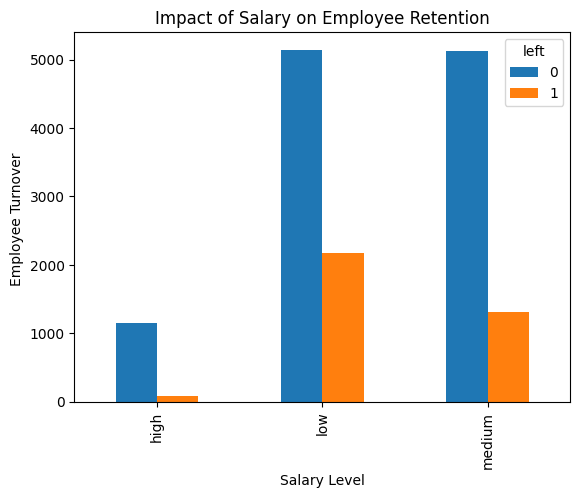

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
salary_retention = df.groupby('salary')['left'].mean().reset_index()

pd.crosstab(df['salary'], df['left']).plot(kind='bar')
plt.title("Salary vs. Retention")

plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Employee Turnover ')
plt.show()




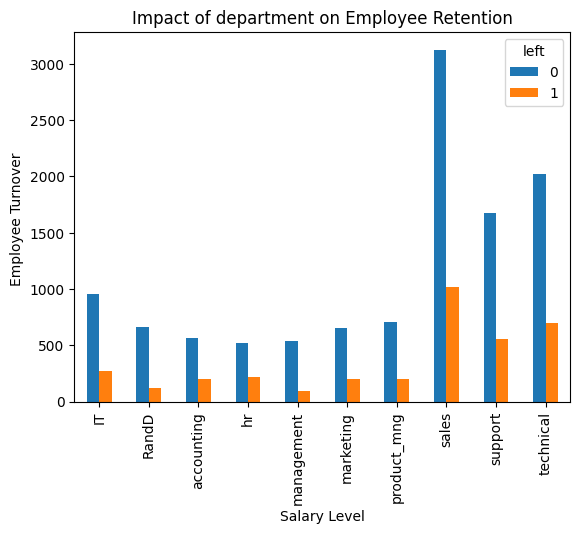

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
salary_retention = df.groupby('Department')['left'].mean().reset_index()

pd.crosstab(df['Department'], df['left']).plot(kind='bar')
plt.title("department vs. Retention")

plt.title('Impact of department on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Employee Turnover ')
plt.show()




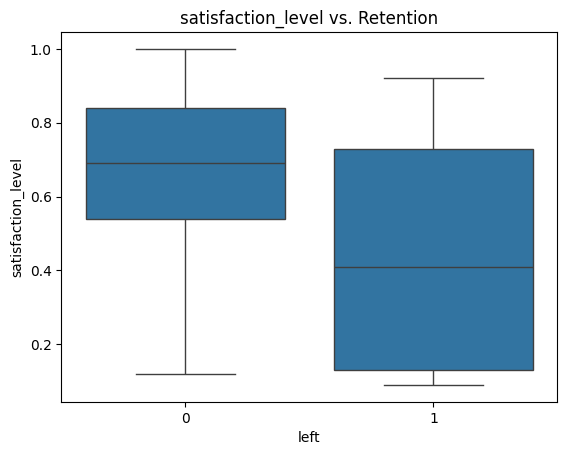

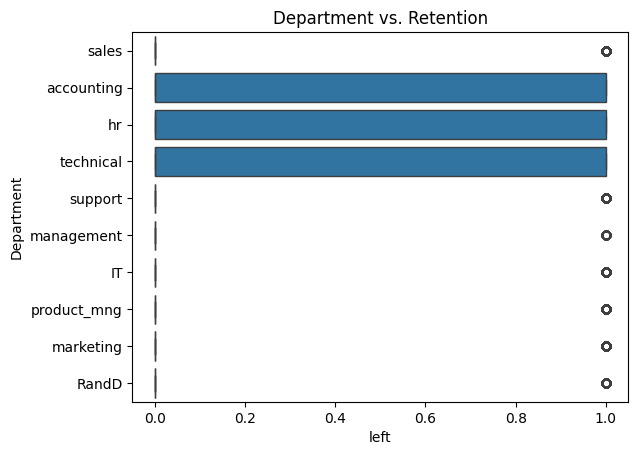

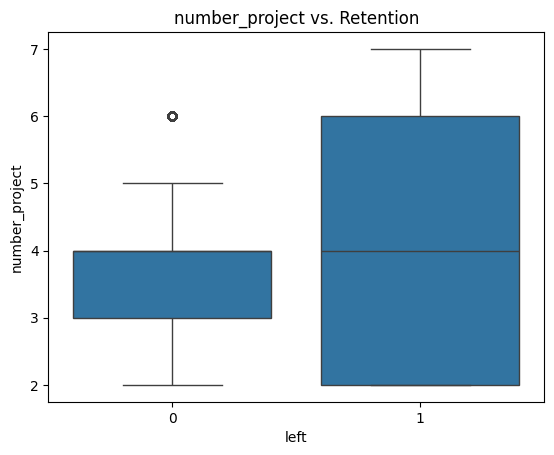

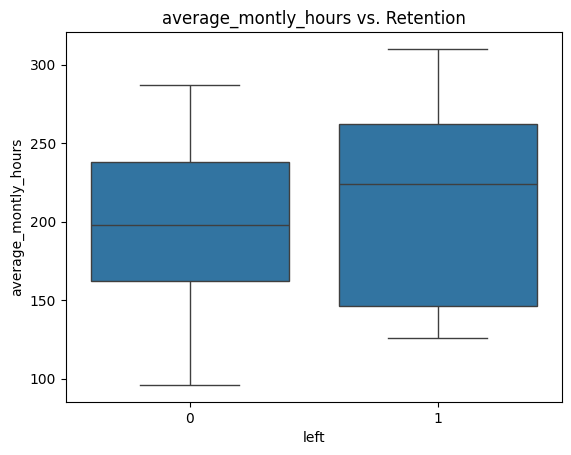

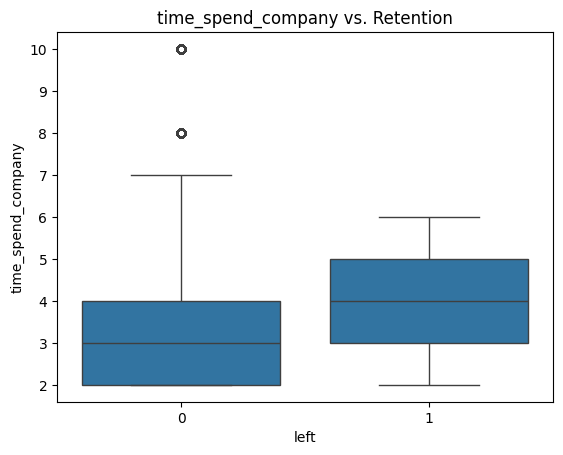

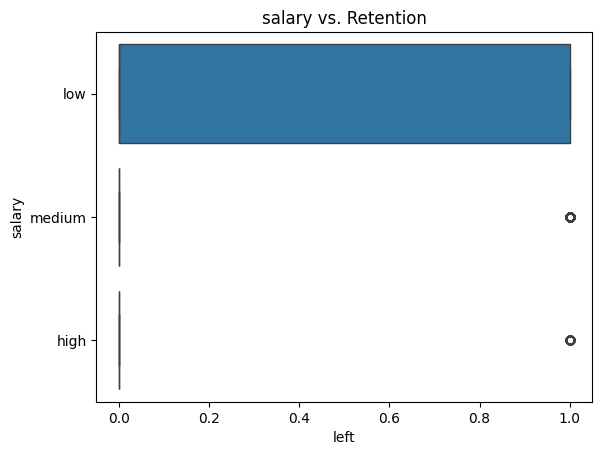

In [40]:
    numerical_cols = ['satisfaction_level', 'Department', 'number_project',
                      'average_montly_hours', 'time_spend_company','salary']
    for col in numerical_cols:
        sns.boxplot(x='left', y=col, data=df)
        plt.title(f"{col} vs. Retention")
        plt.show()


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df_with_dummies = pd.get_dummies(df, columns=['salary'], drop_first=True)


key_variables = ['satisfaction_level', 'time_spend_company', 'Department', 'average_montly_hours','last_evaluation','promotion_last_5years']

X = df_with_dummies[key_variables]
y = df['left']

X = pd.get_dummies(X, columns=['Department'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")



Accuracy of the model: 0.7493333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 1.00


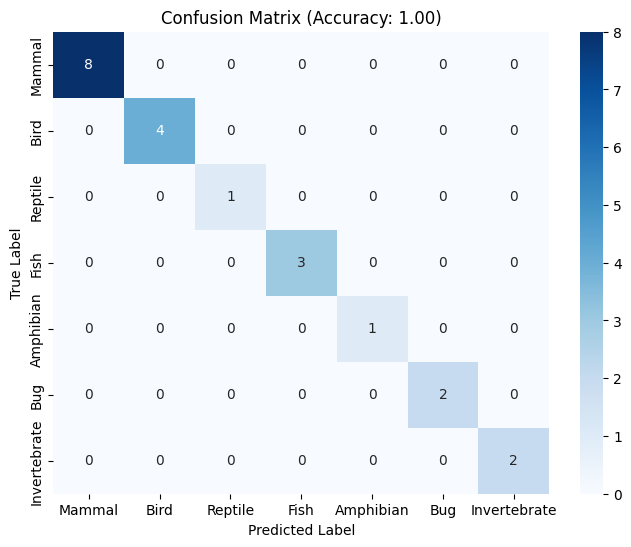

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


zoo_data = pd.read_csv("zoo-data.csv")
class_type = pd.read_csv("zoo-class-type.csv")


zoo_data = zoo_data.drop(columns=["animal_name"])


X = zoo_data.drop(columns=["class_type"])
y = zoo_data["class_type"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_type["Class_Type"], yticklabels=class_type["Class_Type"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()
